In [1]:
import numpy as np
import cmath
import math
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [4]:
view = np.array([[-2, 1], [-1.5, 1.5]])

def function(z, c):
	return z**2 + c

def recursive(f, n):
	def f1(x, *args):
		for i in range(n):
			x = f(x, *args)
		return x
	return f1



cc = 0
pts = 1_000_000
its = 5_000

In [5]:
l=[]
cc = 0
z = np.random.rand(pts, 2) * (view[:,1] - view[:,0]) + view[:, 0]
z = z[:,0]+ 1j*z[:,1]
c = np.copy(z)

x = np.logical_not((np.abs(c)**2) * (8 * np.abs(c)**2 - 3) <= 3/32 - c.real)
c = c[x]

z = np.zeros_like(c)
n = 0
l1 = []

ind = np.arange(z.shape[0])

for i in tqdm(range(its)):
    z = function(z, c)
    n += 1
    l1.append([z.copy(), ind.copy(), n])

    x = np.abs(z) < 2
    c = c[x]
    z = z[x]
    ind = ind[x]


100%|██████████| 5000/5000 [00:06<00:00, 745.70it/s]


In [28]:
print(len(l1))
l = []
ll = []
for a in tqdm(l1):
    x = np.logical_not(np.isin(a[1], ind))
    l2 = np.stack((a[0][x].real, a[0][x].imag, np.full(a[0][x].shape, a[2]))).T
    l.extend(l2.tolist())

ll = [[e[0] for e in l], [e[1] for e in l], [e[2] for e in l]]
print(len(l))

5000
100%|██████████| 5000/5000 [03:51<00:00, 21.56it/s]
27506225


In [29]:
print(l[0])

[0.7981154279250511, -1.4329576619758773, 1.0]


In [44]:
res = 4320
H = np.histogram2d(ll[0], ll[1], bins=res, range=view)
density = H[0]
H2 = np.histogram2d(ll[0], ll[1], bins=res, range=view, weights=ll[2])
density2 = H2[0]

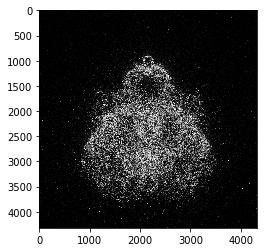

In [47]:
#final = np.mod(density2, 20)/density
final = density2.copy()/80_00
final = np.sqrt(final)
#final = np.log(1+final)

vmax = 1
plt.imshow(final, cmap='Greys_r', vmin=0, vmax=vmax)
plt.show()

In [48]:
plt.imsave('t13b.png',final, cmap='Greys_r', vmin=0, vmax=vmax)

In [ ]:
import pickle
with open('saved.dat', "wb") as f:
    pickle.dump(l, f)